# Lecture 10 - Fitting Polynomials and Step Functions

In [2]:
library(ISLR)
attach(Wage)
?Wage

Wage {ISLR},R Documentation


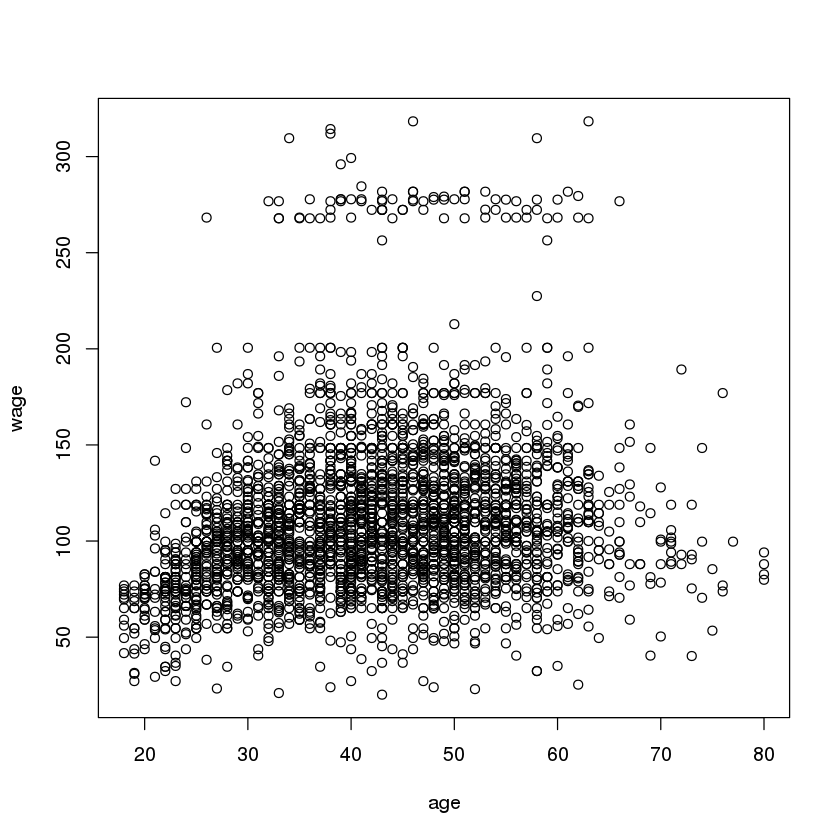

In [3]:
plot(age,wage)

## Fit a polynomial Regression

There are many way to do this (R is a very flexible langauge)

In [4]:
fit=lm(wage~poly(age,4),data=Wage) #the function poly() creates a matrix of *orthogonal* polynomials
coef(summary(fit))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),111.70361,0.7287409,153.283015,0.000000e+00
"poly(age, 4)1",447.06785,39.9147851,11.200558,1.484604e-28
"poly(age, 4)2",-478.31581,39.9147851,-11.983424,2.355831e-32
"poly(age, 4)3",125.52169,39.9147851,3.144742,1.678622e-03
"poly(age, 4)4",-77.91118,39.9147851,-1.951938,5.103865e-02


In [5]:
fit2=lm(wage~poly(age,4,raw=T),data=Wage) #fits the "raw" polynomials, this affects the coefficeints, but not the fitted values
coef(summary(fit2))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.841542e+02,6.004038e+01,-3.067172,0.0021802539
"poly(age, 4, raw = T)1",2.124552e+01,5.886748e+00,3.609042,0.0003123618
"poly(age, 4, raw = T)2",-5.638593e-01,2.061083e-01,-2.735743,0.0062606446
"poly(age, 4, raw = T)3",6.810688e-03,3.065931e-03,2.221409,0.0263977518
"poly(age, 4, raw = T)4",-3.203830e-05,1.641359e-05,-1.951938,0.0510386498


In [7]:
fit2a=lm(wage~age+I(age^2)+I(age^3)+I(age^4),data=Wage) #an alternative way to add polynomials which allows ^ to be interpreted as a mathematical "power" (instead of as a way to denote an interaction term)
coef(summary(fit2a))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.841542e+02,6.004038e+01,-3.067172,0.0021802539
age,2.124552e+01,5.886748e+00,3.609042,0.0003123618
I(age^2),-5.638593e-01,2.061083e-01,-2.735743,0.0062606446
I(age^3),6.810688e-03,3.065931e-03,2.221409,0.0263977518
I(age^4),-3.203830e-05,1.641359e-05,-1.951938,0.0510386498


In [8]:
fit2b=lm(wage~cbind(age,age^2,age^3,age^4),data=Wage) #an alternative way to add polynomials which allows ^ to be interpreted as a mathematical "power" (instead of as a way to denote an interaction term)
coef(summary(fit2b))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.841542e+02,6.004038e+01,-3.067172,0.0021802539
"cbind(age, age^2, age^3, age^4)age",2.124552e+01,5.886748e+00,3.609042,0.0003123618
"cbind(age, age^2, age^3, age^4)",-5.638593e-01,2.061083e-01,-2.735743,0.0062606446
"cbind(age, age^2, age^3, age^4)",6.810688e-03,3.065931e-03,2.221409,0.0263977518
"cbind(age, age^2, age^3, age^4)",-3.203830e-05,1.641359e-05,-1.951938,0.0510386498


### Report the Variance Covariance matrix from the fitted model

In [9]:
vcov(fit2)

,(Intercept),"poly(age, 4, raw = T)1","poly(age, 4, raw = T)2","poly(age, 4, raw = T)3","poly(age, 4, raw = T)4"
(Intercept),3.604847e+03,-3.512230e+02,1.210270e+01,-1.759690e-01,9.158120e-04
"poly(age, 4, raw = T)1",-3.512230e+02,3.465380e+01,-1.207207e+00,1.771806e-02,-9.296448e-05
"poly(age, 4, raw = T)2",1.210270e+01,-1.207207e+00,4.248061e-02,-6.291981e-04,3.328488e-06
"poly(age, 4, raw = T)3",-1.759690e-01,1.771806e-02,-6.291981e-04,9.399934e-06,-5.012724e-08
"poly(age, 4, raw = T)4",9.158120e-04,-9.296448e-05,3.328488e-06,-5.012724e-08,2.694059e-10


In [14]:
sqrt(vcov(fit2)[1,1])

[1] 60.04038

Notice that this is the standard error reported for the intercept parameter in the summary table

### Do the different methods lead to different predictions? (no)

In [9]:
agelims=range(age)
age.grid=seq(from=agelims[1],to=agelims[2])

preds=predict(fit,newdata=list(age=age.grid),se=T)
se.bands=cbind(preds$fit+2*preds$se,preds$fit-2*preds$se)

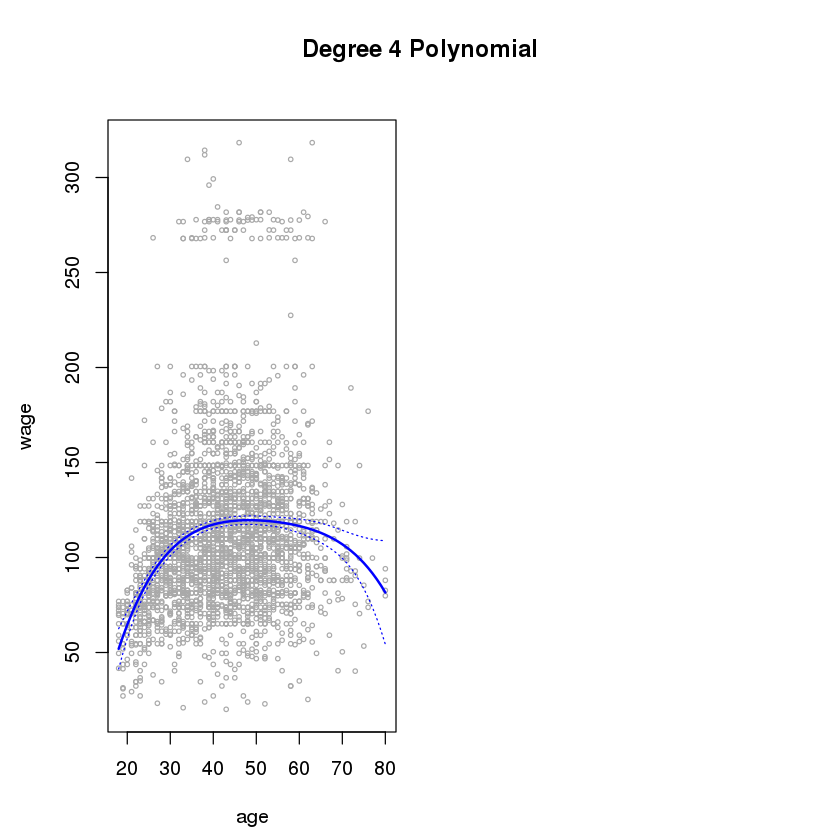

In [10]:
par(mfrow=c(1,2),mar=c(4.5,4.5,1,1),oma=c(0,0,4,0)) #control margins of plot
plot(age,wage,xlim=agelims, cex=.5,col="darkgray")
title("Degree 4 Polynomial",outer=T) #create title
lines(age.grid,preds$fit,lwd=2,col="blue")
matlines(age.grid,se.bands,lwd=1,col="blue",lty=3) #plot standard error bands

We can verfiy that the predicted values between the different methods of fitting a polynomial don't matter (for the predicted values)

In [11]:
preds2=predict(fit2,newdata=list(age=age.grid),se=T)
max(abs(preds$fit-preds2$fit))

[1] 8.81073e-12

### How to determine the degree of polynomial

Comparing fit of model with an F-test

In [12]:
fit.1=lm(wage~age,data=Wage)
fit.2=lm(wage~poly(age,2),data=Wage)
fit.3=lm(wage~poly(age,3),data=Wage)
fit.4=lm(wage~poly(age,4),data=Wage)
fit.5=lm(wage~poly(age,5),data=Wage)
anova(fit.1,fit.2,fit.3,fit.4,fit.5) #performs an F-test for each of the subsequent models 

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2998,5022216,NA,NA,NA,NA
2997,4793430,1,228786.010,143.5931074,2.367734e-32
2996,4777674,1,15755.694,9.8887559,1.679213e-03
2995,4771604,1,6070.152,3.8098134,5.104623e-02
2994,4770322,1,1282.563,0.8049758,3.696820e-01


The p-value comparing the linear to quadratic is essentially zero.

The p-value for the quadratic to cubic is small

The cubic to quartic is barely siginifcant, and the degree-5 doesn't add much

We can also examine the p-values of the t-test for each predictor, but note that these suffer from the multiple comparisons problem if we're doing model selection

In [13]:
coef(summary(fit)) #retrive p-values(for t-test) directly from the lm.fit using poly()

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),111.70361,0.7287409,153.283015,0.000000e+00
"poly(age, 4)1",447.06785,39.9147851,11.200558,1.484604e-28
"poly(age, 4)2",-478.31581,39.9147851,-11.983424,2.355831e-32
"poly(age, 4)3",125.52169,39.9147851,3.144742,1.678622e-03
"poly(age, 4)4",-77.91118,39.9147851,-1.951938,5.103865e-02


Alternatively (and perhaps preferably), we can use cross-validation.

## Polynomial Logistic Regression

We want to understand the relationshiup between high earners (>$250,000) and Age

In [14]:
fit=glm(I(wage>250)~poly(age,4),data=Wage,family=binomial) # I() converts TRUE and FALSE to 1 and 0

In [15]:
preds=predict(fit,newdata=list(age=age.grid),se=T) #make predictions, including standard erros at predicted value

But calculating standard errors is more ivolved, becuase we get the standard errors for the logit ($X\hat\beta$), not the predicted probabilities themselves.

So we have to calculate them.

In [16]:
pfit=exp(preds$fit)/(1+exp(preds$fit)) # calculate predicted probabilities from the estimates
se.bands.logit=cbind(preds$fit+2*preds$se.fit,preds$fit-2*preds$se.fit) # calculate the confodence interval for the logit
se.bands=exp(se.bands.logit)/(1+exp(se.bands.logit)) # convert that to the predicted probabilities

Now construct the plot

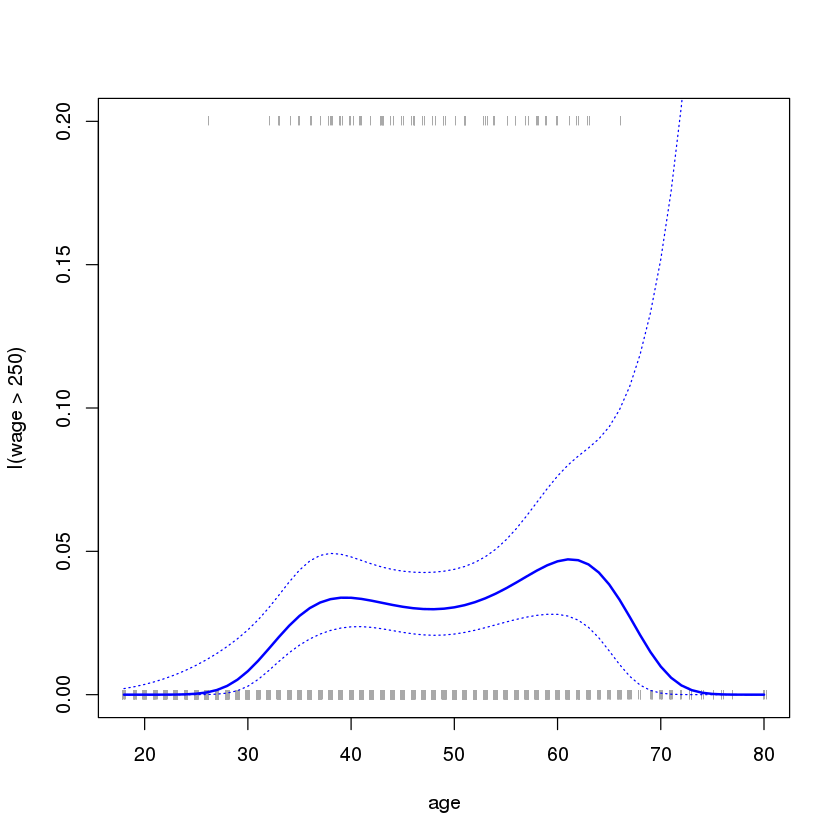

In [17]:
plot(age,I(wage>250),xlim=agelims,type="n",ylim=c(0,.2))
points(jitter(age),I((wage>250)/5),cex=.5,pch="|",col="darkgrey") #jitter() shifts the age values slightly so that they don't cover each other up on the plot
lines(age.grid,pfit,lwd=2,col="blue")
matlines(age.grid,se.bands,lwd=1,col="blue",lty=3)

## Fitting a Stepwise Function

We use the cut() funciton to fit a step function

In [18]:
table(cut(age,4))


(17.9,33.5]   (33.5,49]   (49,64.5] (64.5,80.1] 
        750        1399         779          72 

cut() picks cutpoints automatically, returns an ordered categorical variables. 

We could also use the breaks() function as an argument to cut() to specify our own cutpoints

In [19]:
fit=lm(wage~cut(age,4),data=Wage) #lm() then automatically converts the cutpoints into a set of dummy variables
coef(summary(fit))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),94.158392,1.476069,63.789970,0.000000e+00
"cut(age, 4)(33.5,49]",24.053491,1.829431,13.148074,1.982315e-38
"cut(age, 4)(49,64.5]",23.664559,2.067958,11.443444,1.040750e-29
"cut(age, 4)(64.5,80.1]",7.640592,4.987424,1.531972,1.256350e-01


The dummy for age<33.5 is automatically left out of the regression. This is becasue we can't have an intercept and all possible categories of a dummy variable.